# In-class week 09
---

In this section, you will learn:
1. Build a graph using `networkx` package.
2. Access nodes/edges features.
3. Building a graph using physical data.

## Introduction 

Graph is mathematical structure that represent the connection between each elements.  
The Graph Neural Network(GNN) is a state-of-the-art ML architecture that training a NN model using graph features.  
In now days, GNN has been implement to social network service, natural language processing, and physics problems.  

## Tracking Problem in LHC 

Pattern recognition problems in high energy physics are notably different from traditional machine learning applications in computer vision. Reconstruction algorithms identify and measure the kinematic properties of particles produced in high
energy collisions and recorded with complex detector systems. Two critical applications are the reconstruction of charged particle trajectories in tracking detectors and the reconstruction of particle showers in calorimeters. These two problems
have unique challenges and characteristics, but both have high dimensionality, high degree of sparsity, and complex geometric layouts. Graph Neural Networks (GNNs) are a relatively new class of deep learning architectures which can deal
with such data effectively, allowing scientists to incorporate domain knowledge in a graph structure and learn powerful representations leveraging that structure to identify patterns of interest. In this work we demonstrate the applicability of
GNNs to these two diverse particle reconstruction problems.

## Reference 

https://github.com/vesal-rm/hls4ml/tree/master/example-prjs/graph/gnn_simple
    
https://github.com/jmduarte/exatrkx-neurips19/blob/master/gnn-tracking/notebooks/DataAnalysis.ipynb
    
https://deepfindr.com/understanding-graph-neural-networks-part-1-3/

 
    
Data Ref: [WalkThroughGNN4Tracking](https://github.com/exatrkx/exatrkx-iml2020/blob/main/notebooks/WalkThroughGNN4Tracking.ipynb)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm
import tensorflow as tf
print(torch.__version__)
print(tf.__version__)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

!pip install https://github.com/LAL/trackml-library/archive/master.zip
    
from trackml.dataset import load_dataset
from trackml.dataset import load_event

1.7.0
2.4.1
  Created wheel for trackml: filename=trackml-3-py2.py3-none-any.whl size=13512 sha256=36b13fce2cba02289f84403afd148ad3f9882c3700c0a43cb1b663ca45dcc59b
  Stored in directory: /tmp/pip-ephem-wheel-cache-xgys2vqu/wheels/ed/8e/98/e59687172a845d3b8636719ef7d3cec3815d7eb1bd2a00ff1d
Successfully built trackml


## Part A Basic Operation

In part A, you need to get familiar with `networkx` package and graph structure.

1. Build a graph with 5 nodes.
2. Add edges in each nodes.
3. Add attribute and weight to edges.
4. Visualize the graph.

### Part A.1 

Construct a graph with 5 nodes, a, b, c, d, and e.

In [2]:
####################################################################################
# Code for A.1 
G1=nx.Graph()
G1.add_nodes_from('abcde')
G1.nodes
####################################################################################

NodeView(('a', 'b', 'c', 'd', 'e'))

### Part A.2 

Add edges in each nodes.  
Each Nodes will connect to all the other nodes.  
Your answer might be (using `Graph.edges()` to check)
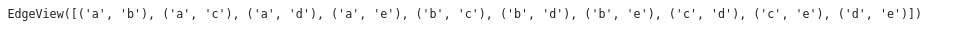

In [3]:
####################################################################################
# Code for A.2
from itertools import combinations 
G1.add_edges_from(combinations('abcde',2))
G1.edges
####################################################################################

EdgeView([('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('b', 'c'), ('b', 'd'), ('b', 'e'), ('c', 'd'), ('c', 'e'), ('d', 'e')])

### Part A.3 

Add attributes and weights to edges.  
You may use the following infomations.

```
== Weights ==

You can randomly generate weights and assign to edges.

== Attribute == 

You can use the following array as your attribute.

attr = ["Blue", "Green", "Yellow", "Red", "Cyan", "Black", "White", "Brown", "Gray", "Rainbow"]

```

In [4]:
####################################################################################
# Code for A.3
attr = ["Blue", "Green", "Yellow", "Red", "Cyan", "Black", "White", "Brown", "Gray", "Rainbow"]
ws=np.random.rand(10)
for e,c,w in zip(G1.edges,attr,ws):G1.edges[e].update({'color':c,'weight':w})
for n1,n2 in G1.edges:print(n1,n2,G1.edges[n1,n2])
####################################################################################

a b {'color': 'Blue', 'weight': 0.13071154659033724}
a c {'color': 'Green', 'weight': 0.3139100059771557}
a d {'color': 'Yellow', 'weight': 0.7732841831213254}
a e {'color': 'Red', 'weight': 0.9189622257579483}
b c {'color': 'Cyan', 'weight': 0.4597145509950168}
b d {'color': 'Black', 'weight': 0.05397950328979695}
b e {'color': 'White', 'weight': 0.6583498457230963}
c d {'color': 'Brown', 'weight': 0.9669165451129919}
c e {'color': 'Gray', 'weight': 0.7497969972641605}
d e {'color': 'Rainbow', 'weight': 0.10754871106600583}


### Part A.4

Visualize your graph.  

Hint: You will find the answer in the [tutorial](https://networkx.org/documentation/stable/tutorial.html) of networkx.

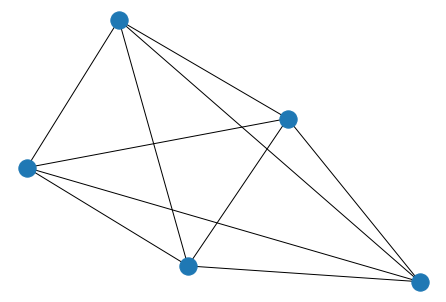

In [5]:
####################################################################################
# Code for A.4 
nx.draw(G1)
####################################################################################

## Part B

In part B, you will need to do:
1. Load the datasets from csv files.
2. Pick the truth track.
3. Construct two graphs using whole dataset and truth information.
4. Visualize the graphs.


* Note:

The graph for whole dataset:    
You should use `hit_id` in `data` to construct nodes.    
You should use `hit_id_1` and `hit_id_2` in `pairs` to construct every edges.    


The graph for truth information:    
Please select `y = True` to pick up true edge in the `pairs` and store in `true_edges`    
You should use `hit_id` in `data` to construct nodes.    
You should use `hit_id_1` and `hit_id_2` in `true_edges` to construct every edges.   

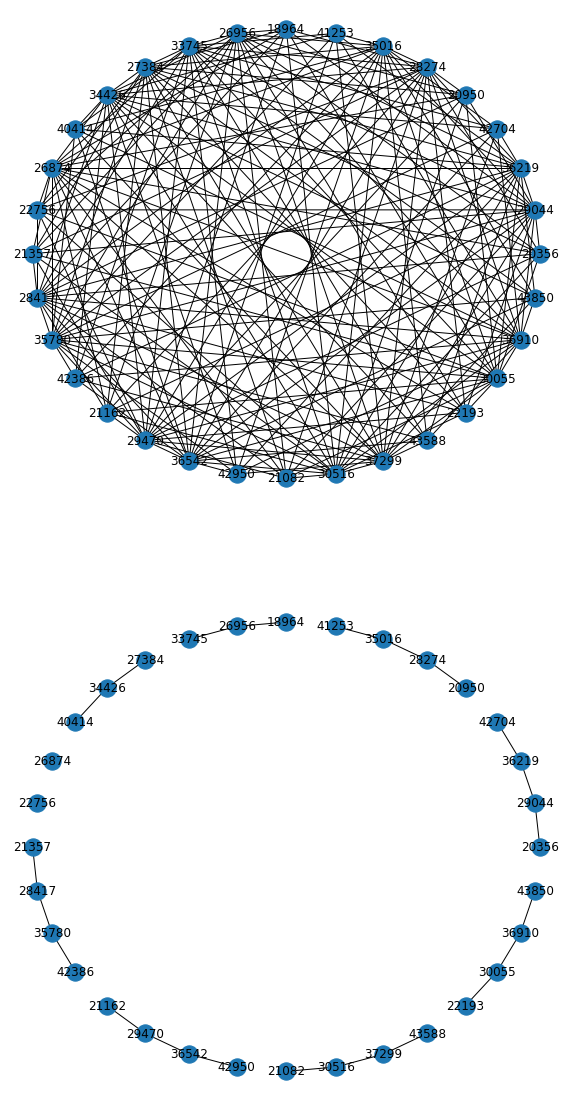

In [6]:
pairs=pd.read_csv('../input/phys591000-week09/pairs.csv')
data =pd.read_csv('../input/phys591000-week09/data_preselection.csv')
true_edges=pairs[pairs['y']==True]
hi='hit_id'
plt.subplots(2,1,figsize=(10,20))
for G,p,i in zip([nx.Graph(),nx.Graph()],[pairs,true_edges],[1,2]):
    G.add_nodes_from(data[hi])
    G.add_edges_from(p[[hi+'_1',hi+'_2']].values)
    plt.subplot(2,1,i)
    nx.draw_shell(G,with_labels=True)
plt.show()